# Digit Recognition

This notebook will explain a digit recognition script I have written in python as part of my emerging technologies module.

The aim was to:
1. load the MNIST dataset into memory
2. create and train a neural network that can recognise handwritten digits
3. create a working model
4. have the ability to import a handwritten image from your own machine
5. have the model interperate the digit 

#### Getting Started
To run this notebook you must first download the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset and save them in a folder called data. This is an important step as the data folder will be used to save the model later in the program.
![data](img/dataSet.PNG)

## Imports needed

In [1]:
# imports needed
import gzip
import os.path
import tkinter as tk
from random import randint
from tkinter import filedialog

import keras as kr
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing as pre
from keras.preprocessing import image

C:\Users\jono-\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Cretaing the network

Add layers to the network using the sequential model

In [2]:
model = kr.models.Sequential()

# Add a hidden layer with 1000 neurons and an input layer with 784.
model.add(kr.layers.Dense(units=1000, activation='relu', input_dim=784))
model.add(kr.layers.Dense(units=1000, activation='relu'))
model.add(kr.layers.Dense(units=1000, activation='relu'))
model.add(kr.layers.Dense(units=1000, activation='relu'))

# Add a 10 neuron output layer.
model.add(kr.layers.Dense(units=10, activation='softmax'))

# Build the graph.
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Helpful resource on the sequential model available [here](https://keras.io/getting-started/sequential-model-guide/)

### Hidden Layers
A hidden layer in an artificial neural network is a layer in between input layers and output layers. The first 4 layers are hidden and they are used to read in the dataset and begin to train the network.
### Output Layers
The output layer in an artificial neural network is the last layer of neurons that produces given outputs for the program. Though they are made much like other artificial neurons in the neural network, output layer neurons may be built or observed in a different way, given that they are the last “actor” nodes on the network.

#### Use gzip to unzip the files

In [3]:
# Unzips the files and reads in as bytes
with gzip.open('data/train-images-idx3-ubyte.gz', 'rb') as f:
    train_img = f.read()

with gzip.open('data/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_lbl = f.read()

Read in the 60000 images in the files and reshapes them into 28*28 pixel array. Then we print the value of the first image along with its binary value.

In [4]:
# reads them into memory 
train_img = ~np.array(list(train_img[16:])).reshape(60000, 28, 28).astype(np.uint8)
train_lbl =  np.array(list(train_lbl[ 8:])).astype(np.uint8)

inputs = train_img.reshape(60000, 784)/255
# For encoding categorical variables.
encoder = pre.LabelBinarizer()
encoder.fit(train_lbl)
outputs = encoder.transform(train_lbl)

print(train_lbl[0], outputs[0])

5 [0 0 0 0 0 1 0 0 0 0]


If the model already exists then it is loaded in from the data folder. If the model is not already saved then training begins and then it is saved to the folder.

In [5]:
if os.path.isfile('data/model.h5'): 
        model = kr.models.load_model('data/model.h5')
# if model already exist uses it
else:
    model.fit(inputs, outputs, epochs=15, batch_size=100)
    model.save("data/model.h5")
    #makes model and saves it 

Unzip and load the test images and labels into memory. The images and labels are then shaped into single arrays.

In [6]:
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_img = f.read()

with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_lbl = f.read()
    
test_img = ~np.array(list(test_img[16:])).reshape(10000, 784).astype(np.uint8)
test_lbl =  np.array(list(test_lbl[ 8:])).astype(np.uint8)

outcome = (encoder.inverse_transform(model.predict(test_img)) == test_lbl).sum()
print("\nModel  is", outcome/100,"% Accurate\n")
print("\nModel has been created or loaded into memory")


Model  is 96.01 % Accurate


Model has been created or loaded into memory


When the program starts the user is prompted to choose an option:
1. Load an image
2. Run tests
3. Exit

Option 1 allows the user to load an image from their own machine.
* I would recomend creating some test samples of your own using paint or gimp
Once the image is loaded the program will make its own prediction of what it thinks the digit is.

Option 2 allows the user to run tests.
It grabs a user defined number of random tests from the data and makes its predictions.
It then outputs the information to screen.


In [7]:
def testCases():
    amm = int(input("How many tests would you like to run  "))
    from random import randint
    for i in range(amm):
        print("Test Number : ", i+1,"\n")
        x = randint(0, 9999)

        print("The random index: ", x, "\n")
        print("The result array: ")
        test = model.predict(test_img[x:x+1])
        # Print the result array
        print(test, "\n")
        # Get the maximum value from the machine predictions
        pred_result = test.argmax(axis=1)

        print("The program predicted : =>> ",  pred_result)
        print("The number is : =>> ", test_lbl[x:x+1])
        print("===================")

![menu](img/menu.PNG)
Option 1

Window opens on your machine.
![window](img/window.PNG)
I choose six.png to test

In [8]:
def loadImage():
    root = tk.Tk()
    root.withdraw()
    #https://stackoverflow.com/questions/9319317/quick-and-easy-file-dialog-in-python
    file_path = filedialog.askopenfilename()# opens file select window
    img = image.load_img(path=file_path,color_mode = "grayscale",target_size=(28,28,1))
    image1 = np.array(list(image.img_to_array(img))).reshape(1, 784).astype(np.uint8) / 255.0
    # shapes array 
    plt.imshow(img)
    plt.show()
    # plots and displays image
    test = model.predict(image1)
    # runs test of image on model
    print("program has predicted : ", test.argmax(axis=1))
#https://towardsdatascience.com/basics-of-image-classification-with-keras-43779a299c8b

How the program viewed the image
![window2](img/window2.PNG)

Load an image on your system
        1 Load an image
        2 Run test
        3 Exit 
Choose an option 1


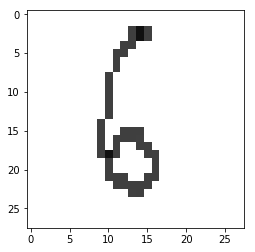

program has predicted :  [6]
        1 Load an image
        2 Run test
        3 Exit 
Choose an option 2
How many tests would you like to run  3
Test Number :  1 

The random index:  2315 

The result array: 
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] 

The program predicted : =>>  [1]
The number is : =>>  [1]
Test Number :  2 

The random index:  4861 

The result array: 
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]] 

The program predicted : =>>  [7]
The number is : =>>  [7]
Test Number :  3 

The random index:  1220 

The result array: 
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] 

The program predicted : =>>  [0]
The number is : =>>  [0]
        1 Load an image
        2 Run test
        3 Exit 


In [ ]:
print("Load an image on your system")

opt=True
while opt:
    print("============================")
    print("""        1 Load an image
        2 Run test
        3 Exit """)
    opt= input("Choose an option ")
    print("============================")
    #https://stackoverflow.com/questions/19964603/creating-a-menu-in-python

    if opt == "1":
        loadImage()
    elif opt == "2":
        testCases()
    elif opt == "3":
        exit()
    else:
        print("Invalid Entry Try Again")

The programs prediction is outputted and it has guessed correctly.
![menu2](img/menu2.PNG)


Option 2 allows the user to run tests
![menu3](img/menu3.PNG)

Option 3 exits the program.

## End